In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from chardet.universaldetector import UniversalDetector
detector = UniversalDetector()
with open('Social Questionnaire.xlsx', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': None, 'confidence': 0.0, 'language': None}

In [ ]:
df=pd.read_excel("./Social Questionnaire.xlsx")
display(df.head(1))


,Timestamp,Farmer's Name,Farmers Surname,GPS (northing),GPS (easting),Farm codes,Ethnic Groups,Location,Age:,Education Level,...,How many cattle are kept on winter pastures? [poultry],How many cattle are kept on winter pastures? [Row 6],How has the number of livestock changed in recent years?,Do you provide supplemental feed to your livestock?,How do you assess the condition of this pasture compared to neighboring pastures?,Has the condition of these pastures changed in the last 10 years?,What measures do you use to change the condition of winter pastures?,"In general, are there degradation problems in the winter pastures of this region",When you keep too many cattle on the pasture what happens to the livestock?,When you keep too many cattle on the pasture what happens to the pasture?
0,2023-03-21 17:32:47.231,khazein,Mamedov,41.384795,45.841298,C1,"Azerbaijani, Iormughalo",Chachuna MR,61-65,Secondary,...,NaN,NaN,Increased,Yes,Normal,Yes,NaN,Yes,"Loses weight, Productivity decreases, Mortalit...",Getting worse


In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
#WE CAN SET timestamp as index column if further analys needed .

In [ ]:
def dataframe_info(df):
    print("dataframe shape is :", df.shape)
    columns_x = df.copy()
    tmp = []

    for col in columns_x:
        ser = df[col]
        tmp.append({
            'name': ser.name,
            'dtype': str(ser.dtype),
            'n_unique': len(ser.unique()),
            'n_null': ser.isnull().sum(),
        })
    df_info = pd.DataFrame(tmp)
    display(df_info)

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.columns[df.dtypes == 'object']

In [ ]:
print("dataframe shape is :",df.shape)

dataframe shape is : (10, 120)


#numerical columns

In [ ]:
dataframe_info(df[num_cols])

dataframe shape is : (10, 33)


,name,dtype,n_unique,n_null
0,GPS (northing),float64,10,0
1,GPS (easting),float64,10,0
2,Telephone,int64,10,0
3,How much of your pasture is your property?,float64,4,4
4,How many hectares of pasture do you lease?,float64,6,2
5,How many hectares of you pastures do you suble...,float64,4,4
6,How many sheep and goat do you have?,int64,8,0
7,How many horse do you have?,float64,7,1
8,How many cow do you have?,float64,6,3
9,2018 Sales in GEL [goat],float64,1,10


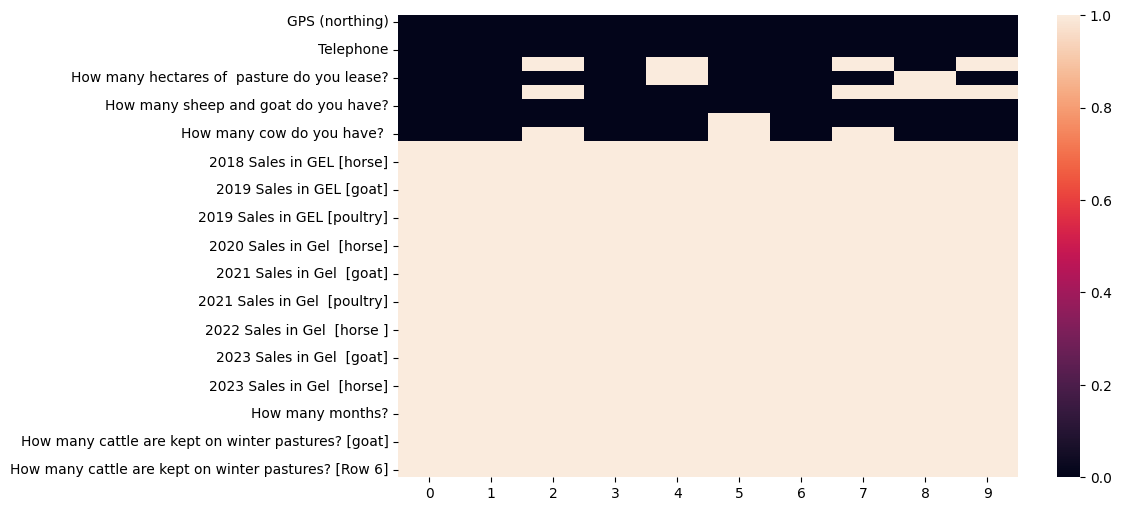

In [ ]:
#nan_values oh numerical cols
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].isna().transpose());

In [ ]:

def nan_values_handle(data):
  print("missing_values")
  print("data_shape :" ,data.shape)
  percent_missing = data.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
  display(missing_value_df.sort_values(ascending=False,by="percent_missing")[:50])

  print("drop_cols_with_more_then_nan_values_0.6%")
  missing_data_high=missing_value_df["percent_missing"]>61
  display(missing_data_high[missing_data_high==True].index)

  drop_cols=missing_data_high[missing_data_high==True].index
  data.drop(drop_cols,axis=1,inplace=True)
  display(data.shape)
  return data

In [ ]:
df_numerical=nan_values_handle(df[num_cols])

missing_values
data_shape : (10, 33)


,column_name,percent_missing
2020 Sales in Gel [horse],2020 Sales in Gel [horse],100.0
2020 Sales in Gel [poultry],2020 Sales in Gel [poultry],100.0
How many cattle are kept on winter pastures? [poultry],How many cattle are kept on winter pastures? [...,100.0
How many cattle are kept on winter pastures? [goat],How many cattle are kept on winter pastures? [...,100.0
"if yes, which","if yes, which",100.0
How many months?,How many months?,100.0
2023 Sales in Gel [poultry ],2023 Sales in Gel [poultry ],100.0
2023 Sales in Gel [horse],2023 Sales in Gel [horse],100.0
2023 Sales in Gel [cattle],2023 Sales in Gel [cattle],100.0
2023 Sales in Gel [goat],2023 Sales in Gel [goat],100.0


drop_cols_with_more_then_nan_values_0.6%


Index(['2018 Sales in GEL [goat]', '2018 Sales in GEL [horse]',
       '2018 Sales in GEL [poultry]', '2019 Sales in GEL [goat]',
       '2019 Sales in GEL [horse]', '2019 Sales in GEL [poultry]',
       '2020 Sales in Gel  [goat]', '2020 Sales in Gel  [horse]',
       '2020 Sales in Gel  [poultry]', '2021 Sales in Gel  [goat]',
       '2021 Sales in Gel  [horse]', '2021 Sales in Gel  [poultry]',
       '2022 Sales in Gel  [goat]', '2022 Sales in Gel  [horse ]',
       '2022 Sales in Gel  [poultry]', '2023 Sales in Gel  [goat]',
       '2023 Sales in Gel  [cattle]', '2023 Sales in Gel  [horse]',
       '2023 Sales in Gel  [poultry ]', 'How many months?', 'if yes, which ',
       'How many cattle are kept on winter pastures? [goat]',
       'How many cattle are kept on winter pastures? [poultry]',
       'How many cattle are kept on winter pastures? [Row 6]'],
      dtype='object')

(10, 9)

dataframe shape is : (10, 9)


,name,dtype,n_unique,n_null
0,GPS (northing),float64,10,0
1,GPS (easting),float64,10,0
2,Telephone,int64,10,0
3,How much of your pasture is your property?,float64,4,4
4,How many hectares of pasture do you lease?,float64,6,2
5,How many hectares of you pastures do you suble...,float64,4,4
6,How many sheep and goat do you have?,int64,8,0
7,How many horse do you have?,float64,7,1
8,How many cow do you have?,float64,6,3


None

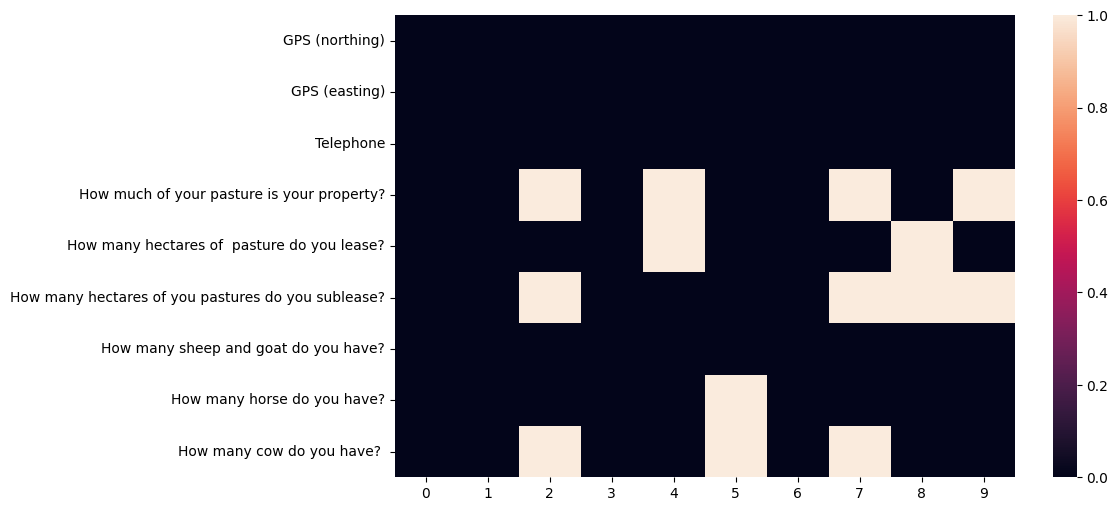

In [ ]:
display(dataframe_info(df_numerical))
plt.figure(figsize=(10,6))
sns.heatmap(df_numerical.isna().transpose());

In [ ]:
df_numerical.describe()

,GPS (northing),GPS (easting),Telephone,How much of your pasture is your property?,How many hectares of pasture do you lease?,How many hectares of you pastures do you sublease?,How many sheep and goat do you have?,How many horse do you have?,How many cow do you have?
count,10.000000,10.000000,1.000000e+01,6.000000,8.000000,6.000000,10.000000,9.000000,7.000000
mean,41.241618,47.171248,5.683977e+08,366.666667,306.250000,131.666667,1595.000000,5.777778,52.142857
std,0.066797,3.299734,2.066702e+07,403.319559,267.845238,205.953069,726.655199,3.073181,32.895940
min,41.131403,45.752524,5.512067e+08,0.000000,0.000000,0.000000,600.000000,1.000000,0.000000
25%,41.203108,46.180442,5.557086e+08,0.000000,0.000000,0.000000,1325.000000,5.000000,42.500000
50%,41.240196,46.231449,5.582781e+08,350.000000,400.000000,0.000000,1450.000000,6.000000,50.000000
75%,41.265862,46.247301,5.866478e+08,700.000000,512.500000,262.500000,1612.500000,6.000000,60.000000
max,41.384795,56.548375,5.992015e+08,800.000000,600.000000,440.000000,3400.000000,12.000000,110.000000


In [ ]:
df_numerical

,GPS (northing),GPS (easting),Telephone,How much of your pasture is your property?,How many hectares of pasture do you lease?,How many hectares of you pastures do you sublease?,How many sheep and goat do you have?,How many horse do you have?,How many cow do you have?
0,41.384795,45.841298,595946821,0.0,0.0,350.0,1500,3.0,50.0
1,41.201768,46.233231,599116437,700.0,0.0,0.0,1400,5.0,60.0
2,41.131403,56.548375,551648647,NaN,550.0,NaN,600,12.0,NaN
3,41.282144,45.752524,599201453,700.0,0.0,0.0,2000,6.0,110.0
4,41.247460,46.250329,555642188,NaN,NaN,440.0,1500,8.0,0.0
5,41.198348,46.246768,558176767,0.0,300.0,0.0,1300,NaN,NaN
6,41.207127,46.247478,558379391,0.0,500.0,0.0,1400,5.0,60.0
7,41.232932,46.179477,558750585,NaN,600.0,NaN,1650,1.0,NaN
8,41.266621,46.229667,555907662,800.0,NaN,NaN,3400,6.0,35.0
9,41.263586,46.183337,551206699,NaN,500.0,NaN,1200,6.0,50.0


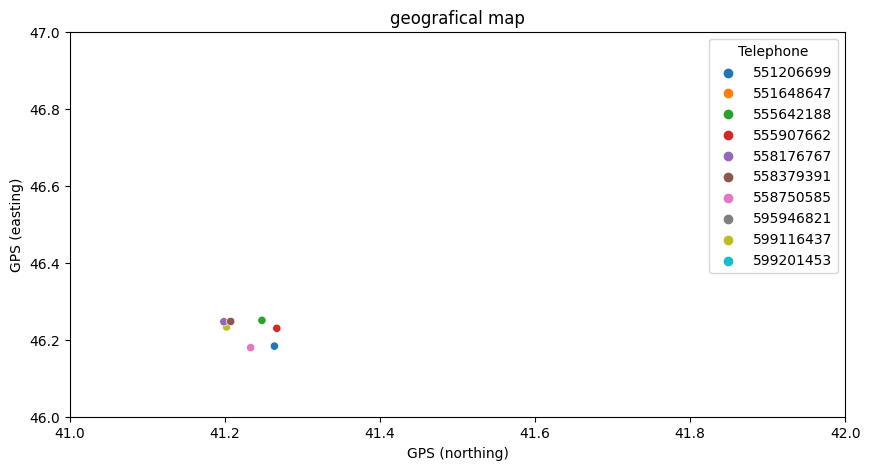

In [ ]:
df_map = df_numerical[['GPS (northing)','GPS (easting)','Telephone']]
fig = plt.figure(figsize=(10, 5))

scat_plot = sns.scatterplot(data=df_map,
                            x='GPS (northing)',
                            y='GPS (easting)',
                            hue='Telephone',
                            palette='tab10',)
                            #s=1);
scat_plot.set_ylim(46, 47)
scat_plot.set_xlim(41, 42)
scat_plot.set_title('geografical map');

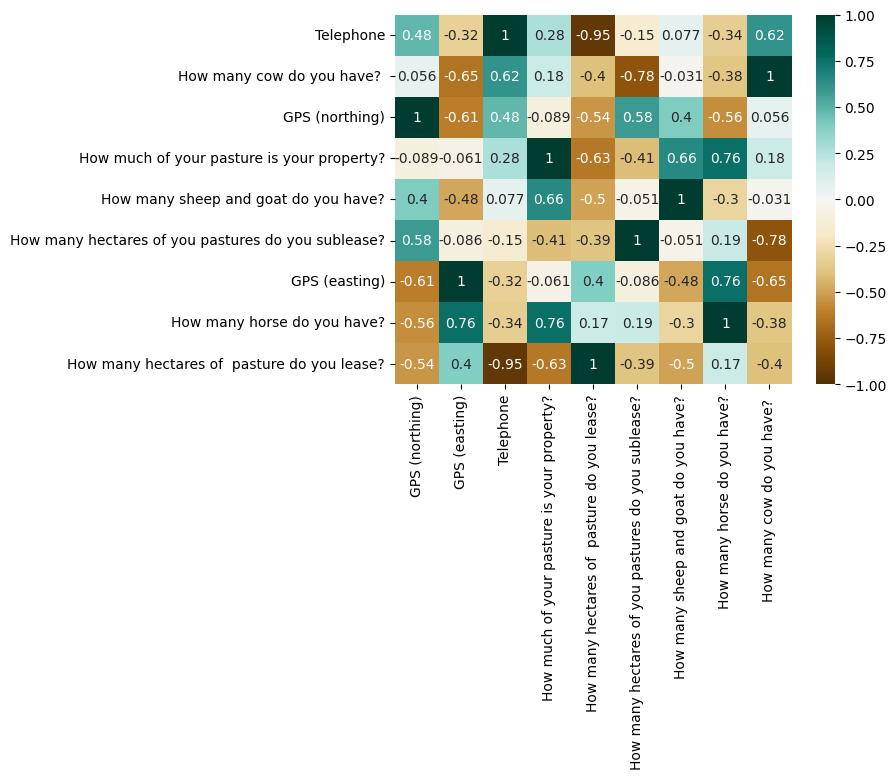

In [ ]:
heatmap = sns.heatmap(df_numerical.corr().sort_values(by='Telephone', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
dataframe_info(df[cat_cols])

dataframe shape is : (10, 86)


,name,dtype,n_unique,n_null
0,Farmer's Name,object,10,0
1,Farmers Surname,object,9,0
2,Farm codes,object,7,0
3,Ethnic Groups,object,4,0
4,Location,object,2,0
...,...,...,...,...
81,Has the condition of these pastures changed in...,object,1,0
82,What measures do you use to change the conditi...,object,2,9
83,"In general, are there degradation problems in ...",object,1,0
84,When you keep too many cattle on the pasture w...,object,3,1


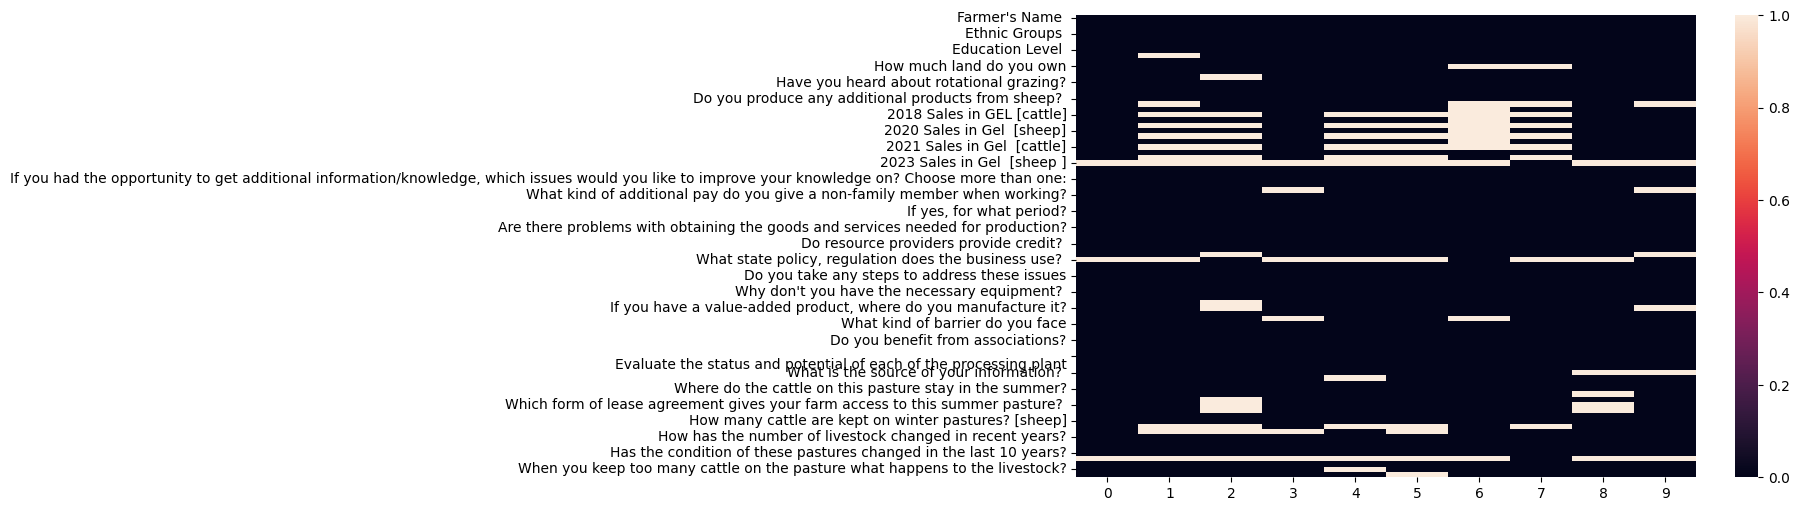

In [ ]:
#nan_values of categorical colums
plt.figure(figsize=(10,6))
sns.heatmap(df[cat_cols].isna().transpose());

In [ ]:
display(df[cat_cols].describe(include='object').transpose())


,count,unique,top,freq
Farmer's Name,10,10,khazein,1
Farmers Surname,10,9,Jamalovi,2
Farm codes,10,7,C1,2
Ethnic Groups,10,4,Azerbaijani,6
Location,10,2,Chachuna MR,9
...,...,...,...,...
Has the condition of these pastures changed in the last 10 years?,10,1,Yes,10
What measures do you use to change the condition of winter pastures?,1,1,Burning grass,1
"In general, are there degradation problems in the winter pastures of this region",10,1,Yes,10
When you keep too many cattle on the pasture what happens to the livestock?,9,2,"Loses weight, Productivity decreases, The stat...",8


In [ ]:
for row in df[cat_cols].columns:
  display(print(f'(column name : {row} and unique values is :',df[row].unique()))

(column name : Farmer's Name  and unique values is : ['khazein' 'Mameda ' 'Otari' 'Ajiqarim ' 'Vasil ' 'Nugzar ' 'Tito '
 'Madid' 'Ajiqarim' 'Kvakaz']


None

(column name : Farmers Surname  and unique values is : [' Mamedov' 'Tavsanovi' 'Fareulidze' 'Jamalovi' 'Ghulelauri' 'arifovi'
 'Qavtarashvili' ' Alievi' 'Mamedovi']


None

(column name : Farm codes and unique values is : ['C1' 'V1' 'C2' 'C3' 'C4' 'C5' 'C14']


None

(column name : Ethnic Groups  and unique values is : ['Azerbaijani, Iormughalo' 'Azerbaijani' 'Tusheti' 'Kakheti']


None

(column name : Location  and unique values is : ['Chachuna MR' 'Vashlovani PA']


None

(column name : Age: and unique values is : ['61-65' '56-60' '41-45' '51-55' '36-40' '31-35']


None

(column name : Education Level  and unique values is : ['Secondary' 'Higher']


None

(column name : Region  and unique values is : ['Dedoplistkaro Municipality' nan 'Akhmeta Municipality'
 'Sagarejo  Iormughalo']


None

(column name : How many years have you been a farmer? and unique values is : ['36 - 40' '41 - 45' '11 - 15' '26 - 30' '16 - 20' '0 - 5' '31 - 35']


None

(column name : How much land do you own and unique values is : ['301 – 400 ha' '601 - 700 ha' '501 – 600 ha' '401 – 500 ha' nan
 '701 – 800 ha']


None

(column name : How much land do you use? and unique values is : ['81% - 90%' '91% - 100%']


None

(column name : Do you consider/pay attention to biodiversity and environmental issues? and unique values is : ['No' nan 'Yes']


None

(column name : Have you heard about rotational grazing? and unique values is : ['No' 'Yes']


None

(column name : Ever since you heard about rotational grazing, have you been interested in implementing it? and unique values is : ['Yes' 'No']


None

(column name : How long have you been on this farm? and unique values is : ['0 - 5' '11 - 15' '26 - 30' '21 - 25' '31 - 35' '6 - 10']


None

(column name : Do you produce any additional products from sheep?  and unique values is : ['No' 'Yes']


None

(column name : If yes, which  and unique values is : ['Cheese' nan 'Cheese, Wool']


None

(column name : 2018 Sales in GEL [sheep] and unique values is : ['90 001  - 100 000' '300 001 - 400 000' '100 001 - 200 000'
 '200 001 - 300 000' '0 - 100' nan]


None

(column name : 2018 Sales in GEL [cattle] and unique values is : ['20 001  - 30 000' nan '60 001  - 70 000' '10 001 - 20 000']


None

(column name : 2019 Sales in GEL [sheep] and unique values is : ['100 001 - 200 000' '4 001 - 5 000' '200 001 - 300 000' nan
 '400 001 - 500 000']


None

(column name : 2019 Sales in GEL [cattle] and unique values is : ['20 001 - 30 000' nan '60 001 - 70 000' '10 001 - 20 000']


None

(column name : 2020 Sales in Gel  [sheep] and unique values is : ['100 001 - 200 000' '5 001 - 6 000' '300 001 - 400 000'
 '200 001 - 300 000' nan '400 001 - 500 000']


None

(column name : 2020 Sales in Gel  [cattle] and unique values is : ['30 001 - 40 000' nan '70 001 - 80 000' '10 001 - 20 000'
 '20 001 - 30 000']


None

(column name : 2021 Sales in Gel  [sheep] and unique values is : ['100 001 - 200 000' '501 - 600' '200 001 - 300 000' nan
 '400 001 - 500 000']


None

(column name : 2021 Sales in Gel  [cattle] and unique values is : ['40 001 - 50 000' nan '70 001 - 80 000' '20 001 - 30 000'
 '30 001 - 40 000']


None

(column name : 2022 Sales in Gel  [sheep ] and unique values is : ['100 001 - 200 000' '401 - 500' '300 001 - 400 000' '10 001 - 20 000'
 '200 001 - 300 000']


None

(column name : 2022 Sales in Gel  [cattle ] and unique values is : ['40 001 - 50 000' nan '60 001 - 70 000' '20 001 - 30 000'
 '30 001 - 40 000']


None

(column name : 2023 Sales in Gel  [sheep ] and unique values is : [nan '200 001 - 300 000']


None

(column name : Who are the buyers of your products and where do you sell the product? and unique values is : ['wholesale']


None

(column name : What is the relationship between buyers and sellers, in particular, who determines prices and volume/value of purchases? and unique values is : ['Buyer']


None

(column name : If you had the opportunity to get additional information/knowledge, which issues would you like to improve your knowledge on? Choose more than one: and unique values is : ['Product development;' 'Market access, sales;'
 'Product development;, Market access, sales;'
 'Product development;, Market access, sales;, Establishment of cooperatives;, Environmental requirements related to the implementation of agricultural activities;']


None

(column name : How many family members and strangers worked on your farm last year? and unique values is : ['1-3' '13-15' '4-6' '10-12' '7-9']


None

(column name : In which season?  and unique values is : ['summer, winter' nan]


None

(column name : What kind of additional pay do you give a non-family member when working? and unique values is : ['Seasonal pay, Food, Accommodation, Cigarettes'
 'Food, Accommodation, Cigarettes']


None

(column name : Are employees responsive to your needs?  and unique values is : ['Yes']


None

(column name : Do you need qualified personnel?  and unique values is : ['Yes']


None

(column name : If yes, for what period? and unique values is : ['During giving a birth to sheep' 'During giving a birth to sheep, '
 'During giving a birth to sheep, Milking period'
 'During giving a birth to sheep, milking period'
 'During giving a birth to sheep, Other: Please, specify:, milking period']


None

(column name : Do you experience the lack of knowledge in one of the following topics? and unique values is : ['Milking, Herding, Cheese making, Sheering, Giving a birth to sheep'
 'Milking, Herding, Cheese making, Sheering']


None

(column name : Who are the most important suppliers and how do they secure them? and unique values is : ['sheep food suppliers, medication suppliers, sheep sheering providers, veterinarian'
 'sheep food suppliers, medication suppliers, sheep sheering providers'
 'sheep food suppliers, medication suppliers, sheep sheering providers, veterinarian, Other: Please, specify:']


None

(column name : Are there problems with obtaining the goods and services needed for production? and unique values is : ['Yes' 'No']


None

(column name : Do you purchase other types of goods or services?  and unique values is : ['Barley hay medicines' 'Barley hay medicines migratory route' 'No'
 'Yes, please specify']


None

(column name : Where do you try to find cash if you need it? and unique values is : ['Banks' 'Banks, ']


None

(column name : Do resource providers provide credit?  and unique values is : ['No' 'No, ']


None

(column name : Is there currently a need for additional funding?  and unique values is : ['No']


None

(column name : Do you have any problems?  and unique values is : ['Yes: please, specify, water electricity migratory route'
 'Yes: please, specify, water electricity ' nan 'No' 'Routes, water']


None

(column name : What state policy, regulation does the business use?  and unique values is : [nan 'Registration' 'Subsidies']


None

(column name : Is there any policy/regulation that hinders business growth? and unique values is : ['No' 'Yes: Please, specify:, ']


None

(column name : Which of the following are the most important infrastructural barriers affecting business growth and profitability and unique values is : ['Water, Road transport, Telephone, Electricity supply, Warehousing'
 'Water, Road transport, Telephone, Electricity supply, Warehousing, Other, please, specify:']


None

(column name : Do you take any steps to address these issues and unique values is : ['No' 'Solar panel' 'Yes: Please, specify:' 'No, solar panel']


None

(column name : What is the most important piece of equipment you use? and unique values is : ['Tractor']


None

(column name : What type of equipment do you need that you don't have? and unique values is : ['Tractor']


None

(column name : Why don't you have the necessary equipment?  and unique values is : ["It's expensive, I need it temporarily but not for longer period of time"
 "It's expensive"]


None

(column name : Do you have a warehouse? and unique values is : ['No' 'Yes: Please, specify for what' 'yes ' 'yes']


None

(column name : Does the current state of the warehouse meet your requirements? and unique values is : ['No' nan 'Yes']


None

(column name : If you have a value-added product, where do you manufacture it? and unique values is : ['In house' 'In winter farm, In house' nan
 'Option In summer farm, In winter farm, In house' 'Option In summer farm']


None

(column name : Are you interested in expanding your value-added product activities?  and unique values is : ['Yes' 'No']


None

(column name : If yes, please specify  and unique values is : ['Cheese' 'Cheese, Sour cream, Wool' 'Cheese, Wool' nan]


None

(column name : What kind of barrier do you face and unique values is : ['Lack of time, Difficulty of starting a business, Irrelevant infrastructure'
 'Lack of time, Difficulty of starting a business']


None

(column name : Are you trying to build relationships with local farmers and unique values is : ['No' 'Yes']


None

(column name : Are you a member of some type of association and unique values is : ['No']


None

(column name : Do you benefit from associations? and unique values is : ['No']


None

(column name : Should associations provide additional service? and unique values is : ['Yes' 'No']


None

(column name : Evaluate the status and potential of each of the Farm and unique values is : ['Average' 'Good']


None

(column name : 
Evaluate the status and potential of each of the processing plant and unique values is : ['Average']


None

(column name : Evaluate the status and potential of each of the Warehouse  and unique values is : ['Average' 'Bad']


None

(column name : Evaluate the status and potential of each of the Sales and unique values is : ['Average' 'Bad']


None

(column name : What is the source of your information?  and unique values is : ['Television, Internet, Other people' 'Telophone' 'Television, Internet'
 'Television, Internet, Social Media, Other people'
 'Television, Social Media, Other people' 'Other people' nan]


None

(column name : Are of your interest to get information about an event related to you/your job/location? 
 and unique values is : ['Legislation, Market' 'Legislation, Investment opportunities, Market' nan
 'Market' 'Legislation']


None

(column name : How do you contact dealers/customers, other pastors, relatives/friends and unique values is : ['Social media, Telephone' 'Social media, Telephone, Internet'
 'Telephone, Internet' 'Social media, Telephone, Internet, Gmail'
 'Telephone']


None

(column name : Where do the cattle on this pasture stay in the summer? and unique values is : ['Boghdanovka' 'Samtskhe-Javakheti' 'Tusheti']


None

(column name : Which form of lease agreement gives your farm access to this summer pasture? and unique values is : ['Sub-lease' 'Verbal agreement' 'Traditional use' nan]


None

(column name : Do you own the pasture in question or do you lease the land? and unique values is : ['Lease the pasture' 'Own the pasture' nan 'Sublease the pasture']


None

(column name : Which form of lease agreement gives your farm access to this summer pasture?  and unique values is : ['Verbal' nan 'Sublease']


None

(column name : For how many years is the contract valid? and unique values is : ['1 year' nan]


None

(column name : How do you rate the security of your rights to this winter pasture? and unique values is : ['Low secured' 'Average secured' 'High secured']


None

(column name : How many cattle are kept on winter pastures? [sheep] and unique values is : ['1301x1600' '51x60' '501x600' '1901x2200' '1001x1300' '1601x1900'
 '3401x3700']


None

(column name : How many cattle are kept on winter pastures? [cattle] and unique values is : ['51x60' nan '91x100' '31x40' '41x50']


None

(column name : How many cattle are kept on winter pastures? [horse] and unique values is : ['1x10' nan]


None

(column name : How has the number of livestock changed in recent years? and unique values is : ['Increased' 'Is the same' 'Decreased']


None

(column name : Do you provide supplemental feed to your livestock? and unique values is : ['Yes']


None

(column name : How do you assess the condition of this pasture compared to neighboring pastures? and unique values is : ['Normal' 'Same' 'Good' 'Bad']


None

(column name : Has the condition of these pastures changed in the last 10 years? and unique values is : ['Yes']


None

(column name : What measures do you use to change the condition of winter pastures? and unique values is : [nan 'Burning grass']


None

(column name : In general, are there degradation problems in the winter pastures of this region and unique values is : ['Yes']


None

(column name : When you keep too many cattle on the pasture what happens to the livestock? and unique values is : ['Loses weight, Productivity decreases, Mortality is increasing'
 'Loses weight, Productivity decreases, The state of health is deteriorating, Mortality is increasing'
 nan]


None

(column name : When you keep too many cattle on the pasture what happens to the pasture? and unique values is : ['Getting worse' nan]


None